<a href="https://colab.research.google.com/github/SukanyaPathak2904/Spotify_recommendation_system/blob/main/spotify_Artist_Reccomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/recommendation systems/top50.csv',encoding='latin-1')

In [ ]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
dff= pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/recommendation systems/genres_v2.csv')
#dff[(dff['song_name'] != 'Nan')]
dff.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
dff.dropna(inplace=True)

In [ ]:
df1 = df.rename(columns= {'Valence.' : 'Positiveness'}, inplace= True)

In [ ]:
 df.loc[49] = ['Fake Love', 'BTS', 'KPOP', 150, 95, 85, -3, 55, 70, 190, 10, 46, 99]
 df.loc[50] = ['Idol', 'BTS', 'KPOP', 166, 96, 98, -2, 57, 70, 175, 40, 40, 99]

 #df.index = df.index + 1  # shifting index
 df = df.sort_index()  # sorting by index

In [ ]:
'''df.loc[51] = ['how you like that', 'blackpink', 'kpop', 175, 90, 82, -5, 50, 82, 120, 25, 10, 90]# adding a row
df.loc[52] = ['aiwa', 'none', 'Arabian_singer', 120, 36, 70, -9, 40, 30, 200, 7, 40, 89]
df.loc[53] = ['memories', '1D', 'none']
df.loc[54] = ['beautiful', 'hhdnnv', 'none']'''


In [ ]:
df = df.sort_index()

In [ ]:
print('Beats.Per.Minute', df['Beats.Per.Minute'].max())
print('Beats.Per.Minute', df['Beats.Per.Minute'].min())
print('Energy', df['Energy'].max())
print('Energy', df['Energy'].min())
print('Danceability', df['Danceability'].max())
print('Danceability', df['Danceability'].min())
print('Loudness', df['Loudness..dB..'].max())
print('Loudness', df['Loudness..dB..'].min())
print('liveness', df['Liveness'].max())
print('liveness', df['Liveness'].min())
print('valence', df['valence.'].max())
print('valence', df['valence.'].min())
print('length', df['Length.'].max())
print('length', df['Length.'].min())
print('accoustic', df['Acousticness..'].max())
print('accoustic', df['Acousticness..'].min())
print('speechiness', df['Speechiness.'].max())
print('speechiness', df['Speechiness.'].min())
print('popularity', df['Popularity'].max())
print('popularity', df['Popularity'].min())

Beats.Per.Minute 190
Beats.Per.Minute 85
Energy 96
Energy 32
Danceability 98
Danceability 29
Loudness -2
Loudness -11
liveness 58
liveness 5


KeyError: ignored

In [ ]:
df.tail()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Positiveness,Length.,Acousticness..,Speechiness.,Popularity
46,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
47,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
48,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82
49,Fake Love,BTS,KPOP,150,95,85,-3,55,70,190,10,46,99
50,Idol,BTS,KPOP,166,96,98,-2,57,70,175,40,40,99


In [ ]:
df.describe(include='all')

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Positiveness,Length.,Acousticness..,Speechiness.,Popularity
count,51,51,51,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
unique,51,38,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Señorita,Ed Sheeran,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,122.019608,65.156863,72.039216,-5.549020,16.392157,54.941176,200.725490,22.274510,13.372549,87.921569
std,NaN,NaN,NaN,31.309098,15.357568,12.491534,2.128978,13.632430,22.241773,38.793854,19.050542,12.412833,4.983345
min,NaN,NaN,NaN,85.000000,32.000000,29.000000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,NaN,NaN,NaN,96.000000,55.500000,67.000000,-6.500000,8.000000,38.500000,177.000000,8.500000,5.000000,86.000000
50%,NaN,NaN,NaN,110.000000,68.000000,74.000000,-6.000000,11.000000,56.000000,198.000000,15.000000,7.000000,88.000000
75%,NaN,NaN,NaN,145.000000,78.500000,80.000000,-4.000000,16.500000,70.000000,217.000000,35.000000,17.000000,91.000000


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.head()

,index,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Positiveness,Length.,Acousticness..,Speechiness.,Popularity
0,0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
df['Artist.Name'].nunique()

In [ ]:
df['Artist.Name'].unique()

In [ ]:
df[(df['Popularity'] > 90)]
#df1[(df1['PARAMETERS'] == 'HAEMOGLOBIN') & (df1['MAXVAL']>10)]

,index,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Positiveness,Length.,Acousticness..,Speechiness.,Popularity
1,1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
4,4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
9,9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
10,10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
17,17,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91
19,19,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91
20,20,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
21,21,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91


In [ ]:
df['Popularity'].mode()

In [ ]:
df['Popularity'].max()

In [ ]:
df['Popularity'].min()

In [ ]:
df['Popularity'].mean()

In [ ]:
df['Artist.Name'].mode()

In [ ]:
core= df.corr()

[]

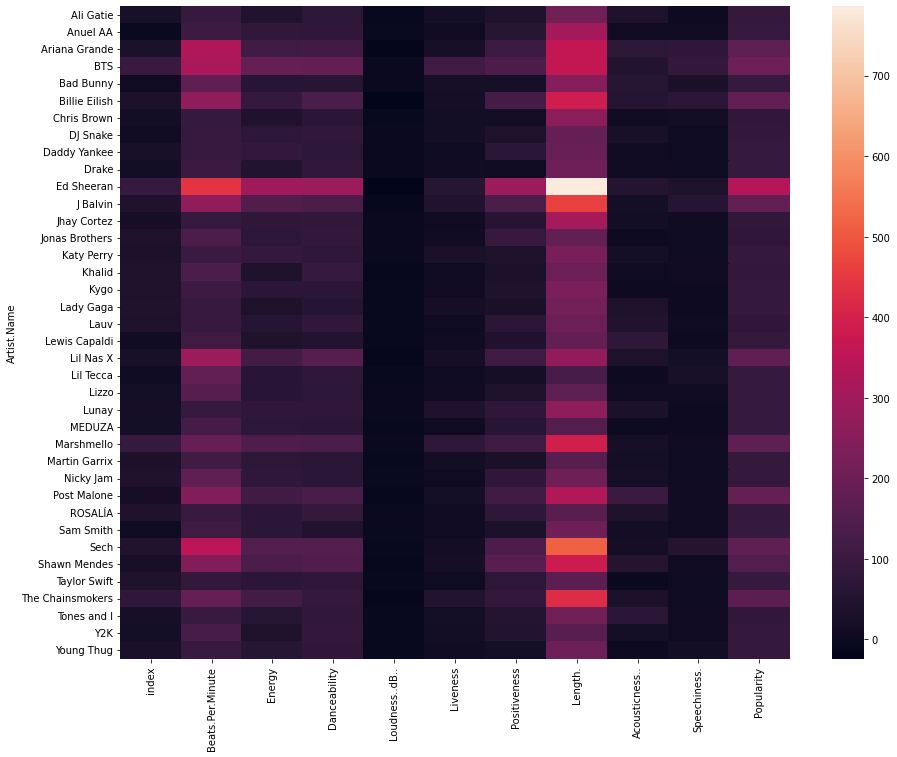

In [ ]:
art =df.groupby(by= ['Artist.Name']).sum()
plt.figure(figsize=(15,12))
art_core =  sns.heatmap(data= art)
plt.plot()

In [ ]:
gen = df.groupby(by= ['Genre']).sum()


In [ ]:
track =  df.groupby(by= ['Track.Name']).sum()
track.sort_values(by = 'Popularity', ascending= False)

,index,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Positiveness,Length.,Acousticness..,Speechiness.,Popularity
Track.Name,,,,,,,,,,,
Fake Love,49,150,95,85,-3,55,70,190,10,46,99
Idol,50,166,96,98,-2,57,70,175,40,40,99
bad guy,9,135,43,70,-11,10,56,194,33,38,95
Goodbyes (Feat. Young Thug),4,150,65,58,-4,11,18,175,45,7,94
Callaita,10,176,62,61,-5,24,24,251,60,31,93
Money In The Grave (Drake ft. Rick Ross),14,101,50,83,-4,12,10,205,10,5,92
China,1,105,81,79,-4,8,61,302,8,9,92
Ransom,6,180,64,75,-6,7,23,131,2,29,92
Otro Trago,35,176,70,75,-5,11,62,226,14,34,91


In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data= core)
plt.plot()

In [ ]:
df[(df['Popularity'] >=91) & (df['Speechiness.']== 3)]

,index,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Positiveness,Length.,Acousticness..,Speechiness.,Popularity
20,20,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91


In [ ]:
df[(df['Popularity'] >50) & (df['Speechiness.']== 46)]

,index,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Positiveness,Length.,Acousticness..,Speechiness.,Popularity
2,2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
49,49,Fake Love,BTS,KPOP,150,95,85,-3,55,70,190,10,46,99


In [ ]:
df['Speechiness.'].max()

46

In [ ]:
df['Speechiness.'].min()

3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


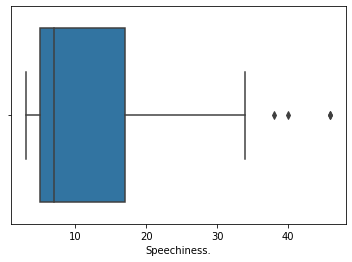

In [ ]:
sns.boxplot(df['Speechiness.'])

In [ ]:
df.columns

In [ ]:
quantile_75_for_popularity = df['Popularity'].quantile(0.75)
quantile_75_for_popularity

91.0

In [ ]:
quantile_for_speechiness = df['Speechiness.'].quantile(0.75)
quantile_for_speechiness

17.0

In [ ]:
sns.boxenplot(df['Popularity'])

In [ ]:
qualified = df[(df['Popularity'] >= quantile_75_for_popularity)][['Track.Name','Artist.Name','Genre', 'Beats.Per.Minute', 'Energy', 'Danceability',
                                                                 'Loudness..dB..', 'Length.', 'Speechiness.','Popularity']]


qualified= df[(df['Speechiness.'] >= quantile_for_speechiness)][['Track.Name','Artist.Name','Genre', 'Beats.Per.Minute', 'Energy', 'Danceability',
                                                                 'Loudness..dB..', 'Length.', 'Speechiness.','Popularity']]

In [ ]:
gen_group = df.groupby('Genre')
gen_group.get_group('boy band')

,index,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Positiveness,Length.,Acousticness..,Speechiness.,Popularity
37,37,Sucker,Jonas Brothers,boy band,138,73,84,-5,11,95,181,4,6,80


In [ ]:
gk = df.groupby(['Genre', 'Popularity'])
gk.first()

In [ ]:
#gk.drop('index',axis=1,inplace=True)
gkk = df.groupby(['Genre', 'Popularity','Artist.Name']).mean()
gkk

index  ...  Speechiness.
Genre            Popularity Artist.Name              ...              
atl hip hop      89         Young Thug         32.0  ...          15.0
australian pop   83         Tones and I        26.0  ...          10.0
big room         89         Martin Garrix      34.0  ...           6.0
boy band         80         Jonas Brothers     37.0  ...           6.0
brostep          88         Marshmello         45.0  ...           5.0
canadian hip hop 88         Y2K                18.0  ...           8.0
                 89         Ali Gatie          27.0  ...           3.0
                 92         Drake              14.0  ...           5.0
canadian pop     70         Shawn Mendes       25.0  ...           6.0
                 79         Shawn Mendes        0.0  ...           3.0
country rap      87         Lil Nas X           8.0  ...          10.0
                 91         Lil Nas X          21.0  ...           8.0
dance pop        78         Lauv               38.0  ...           7.0
                 82         Chris Brown        15.0  ...          15.0
                 85         Ariana Grande       2.0  ...          46.0
                 86         DJ Snake           11.0  ...           7.0
                 87         Lady Gaga          41.0  ...           3.0
                 89         Ariana Grande      31.0  ...          33.0
                            Katy Perry         33.0  ...           6.0
                 90         Taylor Swift       40.0  ...           5.0
dfw rap          91         Post Malone        17.0  ...           5.0
                 94         Post Malone         4.0  ...           7.0
edm              84         The Chainsmokers   30.0  ...           4.0
                 88         Kygo               39.0  ...           3.0
                            The Chainsmokers   47.0  ...           3.0
electropop       89         Billie Eilish      24.0  ...          30.0
                 95         Billie Eilish       9.0  ...          38.0
escape room      91         Lizzo              19.0  ...          11.0
latin            88         Nicky Jam          45.0  ...           6.0
                 89         J Balvin           29.0  ...          25.0
                 90         J Balvin           16.0  ...          32.0
                 91         Daddy Yankee       28.0  ...           6.0
                            Lunay              23.0  ...           4.0
panamanian pop   87         Sech               13.0  ...          20.0
                 91         Sech               35.0  ...          34.0
pop              82         Ed Sheeran         48.0  ...          12.0
                 84         Ed Sheeran          5.0  ...           4.0
                            Khalid             42.0  ...          13.0
                 86         Ed Sheeran          3.0  ...          19.0
                 87         Ed Sheeran         36.0  ...           5.0
                 88         Lewis Capaldi      12.0  ...           3.0
                 90         Sam Smith           7.0  ...           9.0
pop house        91         MEDUZA             20.0  ...           3.0
r&b en espanol   88         ROSALÍA            43.0  ...          12.0
reggaeton        93         Bad Bunny          10.0  ...          31.0
reggaeton flow   83         Jhay Cortez        22.0  ...           7.0
                 92         Anuel AA            1.0  ...           9.0
trap music       92         Lil Tecca           6.0  ...          29.0

[48 rows x 10 columns]

In [ ]:
qualigrp_1= qualified.groupby(['Popularity'])
popular_songs = qualigrp_1.first()

In [ ]:
qualifi_grp_mean = qualified.groupby(['Genre','Artist.Name','Popularity']).mean()

#qualifi_grp_mean.get('canadian hip hop')

In [ ]:
#preparing dancing parameters
filterinf_dance = df[(df['Danceability'] >= 70) & (df['Liveness'] >= 12) ]
dan_grp = filterinf_dance.groupby(['Danceability', 'Artist.Name'])
dance_grp= dan_grp.first()

In [ ]:
#preparing accoustic parameters
filter_info = df[(df['Acousticness..'] >= 40) & (df['Beats.Per.Minute'] <= 140) ]
acs_grp = filter_info.groupby(['Acousticness..', 'Track.Name'])
acoustic = acs_grp.first(min_count= -1)
acoustic

,,index,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Positiveness,Length.,Speechiness.,Popularity
Acousticness..,Track.Name,,,,,,,,,,,,
48,"fuck, i'm lonely (with Anne-Marie) - from 13 Reasons Why: Season 3",38,Lauv,dance pop,95,56,81,-6,6,68,199,7,78
49,If I Can't Have You,25,Shawn Mendes,canadian pop,124,82,69,-4,13,87,191,6,70
56,Sunflower - Spider-Man: Into the Spider-Verse,17,Post Malone,dfw rap,90,48,76,-6,7,91,158,5,91
59,7 rings,31,Ariana Grande,dance pop,140,32,78,-11,9,33,179,33,89
69,Dance Monkey,26,Tones and I,australian pop,98,59,82,-6,18,54,210,10,83
75,Someone You Loved,12,Lewis Capaldi,pop,110,41,50,-6,11,45,182,3,88


In [ ]:
def gen_recommend():
    import gc
    q = [input('Enter your Desired Genres ')]
    g= df['Genre']
    for item in q:
        z= gen_group.get_group(item)
        #z1 = z[:5]
        z1 = z.reset_index(drop=True)
    a = print(z1)
    a
    while (a== True):
        del q
        del z, z1
        gc.collect()

In [ ]:
 gen_recommend()

Enter your Desired Genres pop
   index                                     Track.Name    Artist.Name Genre  \
0      3                Beautiful People (feat. Khalid)     Ed Sheeran   pop   
1      5              I Don't Care (with Justin Bieber)     Ed Sheeran   pop   
2      7                              How Do You Sleep?      Sam Smith   pop   
3     12                              Someone You Loved  Lewis Capaldi   pop   
4     36                 Antisocial (with Travis Scott)     Ed Sheeran   pop   
5     42                                           Talk         Khalid   pop   
6     48  Cross Me (feat. Chance the Rapper & PnB Rock)     Ed Sheeran   pop   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  \
0                93      65            64              -8         8   
1               102      68            80              -5         9   
2               111      68            48              -5         8   
3               110      41            50    

In [ ]:
def artist_recommend():
    import gc
    k = [input('What type of music would you like to hear? Press 1 for Dance and 2 for Accoustic ')]
    print(k)
    for item in k:
        if item == '1':
            return dance_grp.first
        elif item == '2':
            return acoustic
        else:
            print('Invalid Entry ')
        while (m == True):
            del k
            del dance, dancee, danceee
            gc.collect()

In [ ]:
artist_recommend()

What type of music would you like to hear? Press 1 for Dance and 2 for Accoustic 2
['2']


,,index,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Speechiness.,Popularity
Acousticness..,Track.Name,,,,,,,,,,,,
48,"fuck, i'm lonely (with Anne-Marie) - from 13 Reasons Why: Season 3",38,Lauv,dance pop,95,56,81,-6,6,68,199,7,78
49,If I Can't Have You,25,Shawn Mendes,canadian pop,124,82,69,-4,13,87,191,6,70
56,Sunflower - Spider-Man: Into the Spider-Verse,17,Post Malone,dfw rap,90,48,76,-6,7,91,158,5,91
59,7 rings,31,Ariana Grande,dance pop,140,32,78,-11,9,33,179,33,89
69,Dance Monkey,26,Tones and I,australian pop,98,59,82,-6,18,54,210,10,83
75,Someone You Loved,12,Lewis Capaldi,pop,110,41,50,-6,11,45,182,3,88


In [ ]:
def popular():
    return popular_songs

In [ ]:
popular()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Length.,Speechiness.
Popularity,,,,,,,,,
82,No Guidance (feat. Drake),Chris Brown,dance pop,93,45,70,-7,261,15
85,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,186,46
86,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,198,19
87,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,288,20
89,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,-11,195,30
90,LA CANCIÓN,J Balvin,latin,176,65,75,-6,243,32
91,Otro Trago,Sech,panamanian pop,176,70,75,-5,226,34
92,Ransom,Lil Tecca,trap music,180,64,75,-6,131,29
93,Callaita,Bad Bunny,reggaeton,176,62,61,-5,251,31


In [ ]:
qualified.groupby()

In [ ]:
# 1st function
def gen_recommend():
    import gc
    q = [input('Enter your Desired Genres ')]
    g= df['Genre']
    for item in q:
        z= gen_group.get_group(item)
        z1 = z[:5]
        z1 = z1.reset_index(drop=True)
    a = print(z1)
    a
    while (a== True):
        del q
        del z, z1
        gc.collect()

# 2nd Function
def artist_recommend():
    import gc
    k = [input('What type of music would you like to hear? Press 1 for Dance and 2 for Accoustic ')]

    for item in k:
        if item == '1':
           print(dance_grp)
        elif item == '2':
            print(acoustic)
        else:
            print('Invalid Entry ')
        while (k == True):
            del k
            del dance, dancee, danceee
            gc.collect()


#3rd function
def popular():
    print(popular_songs)

In [ ]:
# Creation of main function
def main():
    print('                           *** Welcome to Song Recommendation tab ***                              ')
    print('\n')
    input_cus = input('Dou you wamt to hear popular songs: Yes/No ?')
    if input_cus == 'yes':
        popular()
    elif input_cus == 'no':
        input_cus2 = input(' Do You want to hear songs made on Genre recommendation: Yes/No ?')
        if input_cus2 == 'yes':
            gen_recommend()
        else:
            print('Showing you songs recommended over Artists',artist_recommend())
    else:
        print('Invalid Entry!!')

In [ ]:
main()

                           *** Welcome to Song Recommendation tab ***                              


Dou you wamt to hear popular songs: Yes/No ?no
 Do You want to hear songs made on Genre recommendation: Yes/No ?yes
Enter your Desired Genres pop
   index                         Track.Name  ... Speechiness. Popularity
0      3    Beautiful People (feat. Khalid)  ...           19         86
1      5  I Don't Care (with Justin Bieber)  ...            4         84
2      7                  How Do You Sleep?  ...            9         90
3     12                  Someone You Loved  ...            3         88
4     36     Antisocial (with Travis Scott)  ...            5         87

[5 rows x 14 columns]


In [ ]:
def main2():
    print('                         **** Welcome to Song Selection Tab ****                            ')
    print('\n')
    input_cus ='Do you want to hear popular Songs??'
    if input_cus == 'yes':
        popular()
    elif input_cus == 'no':
        input_cus3 = 'Do you want listen to your favourite artists???'
        if input_cus3 == 'yes':
            artist_recommend()
        else:
            print('showing random songs!!')
            random()
        else:
            print('no songs')


def popular():
     a = df[:]
     b = df['Artist.Name']


